## Import Library

In [27]:
##202331021_Pramesti Anggreini Romadona
import cv2
import numpy as np
import matplotlib.pyplot as plt


## Fungsi Statistik RGB

In [25]:
#202331021_Pramesti Anggreini Romadona
def hitung_statistik_rgb(gambar_rgb)
    r, g, b = gambar_rgb[:, :, 0], gambar_rgb[:, :, 1], gambar_rgb[:, :, 2]
    mean = np.mean([r, g, b], axis=(1, 2))
    std = np.std([r, g, b], axis=(1, 2))
    return mean, std


## Fungsi Ambang Batas Otomatis

In [30]:
#202331021_Pramesti Anggreini Romadona
def threshold_otomatis(mean, std):
    return {
        'biru': int(abs(mean[2] - (mean[0] + mean[1]) / 2) + 1.5 * std[2]),
        'merah_biru': int(0.8 * (std[0] + std[2])),
        'rgb': int((max(std) + min(std)) * 0.5)
    }


## Fungsi Mask HSV

In [33]:
#202331021_Pramesti Anggreini Romadona
def ambil_mask_hsv(hsv_img, warna):
    if warna == 'merah':
        lower1, upper1 = [0, 100, 100], [10, 255, 255]
        lower2, upper2 = [160, 100, 100], [180, 255, 255]
        mask1 = cv2.inRange(hsv_img, np.array(lower1), np.array(upper1))
        mask2 = cv2.inRange(hsv_img, np.array(lower2), np.array(upper2))
        return cv2.bitwise_or(mask1, mask2)
    elif warna == 'biru':
        return cv2.inRange(hsv_img, np.array([100, 100, 100]), np.array([140, 255, 255]))
    elif warna == 'hijau':
        return cv2.inRange(hsv_img, np.array([40, 100, 100]), np.array([80, 255, 255]))
    else:
        return np.zeros(hsv_img.shape[:2], dtype=np.uint8)


## Fungsi Visualisasi Hasil 

In [36]:
##202331021_Pramesti Anggreini Romadona
def tampilkan_mask(mask, gambar_asli, judul, ax):
    hasil = cv2.bitwise_and(gambar_asli, gambar_asli, mask=mask)
    abu = cv2.cvtColor(hasil, cv2.COLOR_RGB2GRAY)
    _, biner = cv2.threshold(abu, 1, 255, cv2.THRESH_BINARY)
    ax.imshow(biner, cmap='gray')
    ax.set_title(judul)


## Main Program

In [39]:
##202331021_Pramesti Anggreini Romadona
# 1. Baca gambar
gambar = cv2.imread('img_nama1.jpg')
gambar_rgb = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)
gambar_hsv = cv2.cvtColor(gambar, cv2.COLOR_BGR2HSV)


In [16]:
# 2. Hitung statistik
mean_rgb, std_rgb = hitung_statistik_rgb(gambar_rgb)
ambang = threshold_otomatis(mean_rgb, std_rgb)



In [20]:
# 3. Buat masker
mask_none = np.zeros(gambar_rgb.shape[:2], dtype=np.uint8)
mask_biru = ambil_mask_hsv(gambar_hsv, 'biru')
mask_merah = ambil_mask_hsv(gambar_hsv, 'merah')
mask_hijau = ambil_mask_hsv(gambar_hsv, 'hijau')

mask_red_blue = cv2.bitwise_or(mask_biru, mask_merah)
mask_rgb = cv2.bitwise_or(mask_red_blue, mask_hijau)




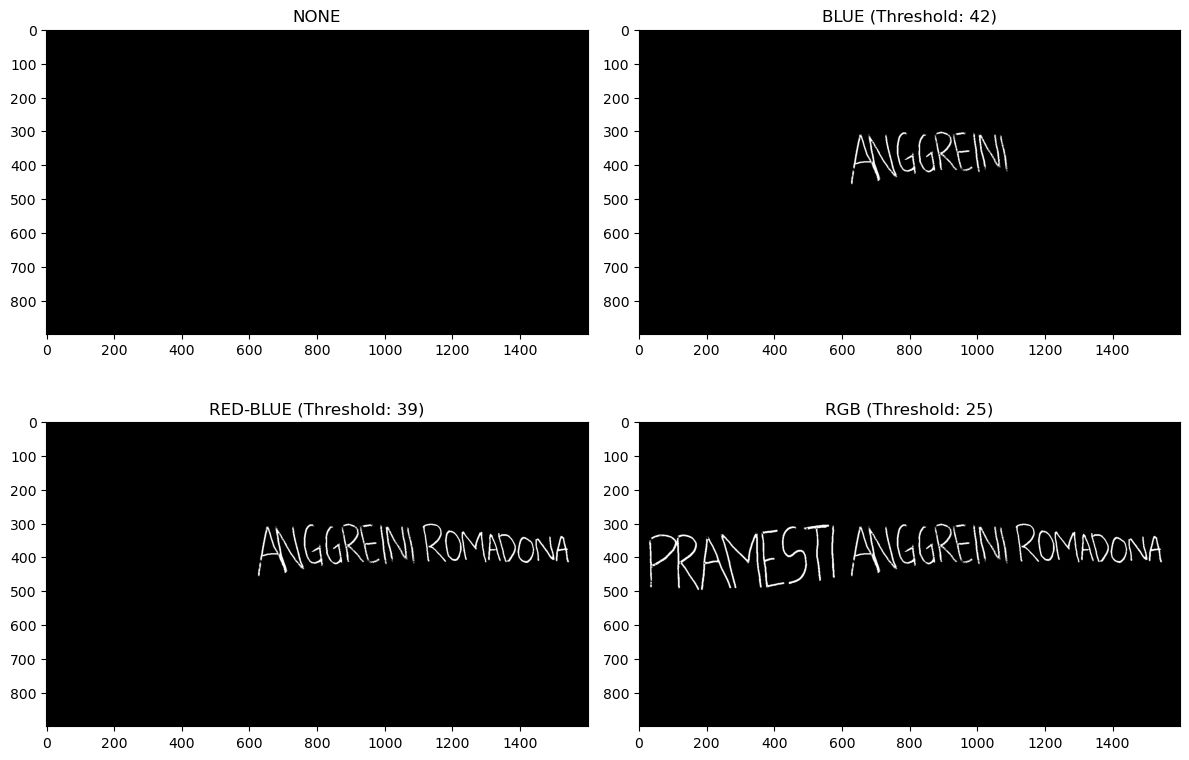

In [22]:
# 4. Tampilkan hasil
judul_list = ['NONE', f"BLUE (Threshold: {ambang['biru']})", f"RED-BLUE (Threshold: {ambang['merah_biru']})", f"RGB (Threshold: {ambang['rgb']})"]
mask_list = [mask_none, mask_biru, mask_red_blue, mask_rgb]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for ax, mask, judul in zip(axs.flat, mask_list, judul_list):
    tampilkan_mask(mask, gambar_rgb, judul, ax)

plt.tight_layout()
plt.show()